In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, RocCurveDisplay

In [5]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
cm = [[1359,  572],
        [ 740, 1329]]

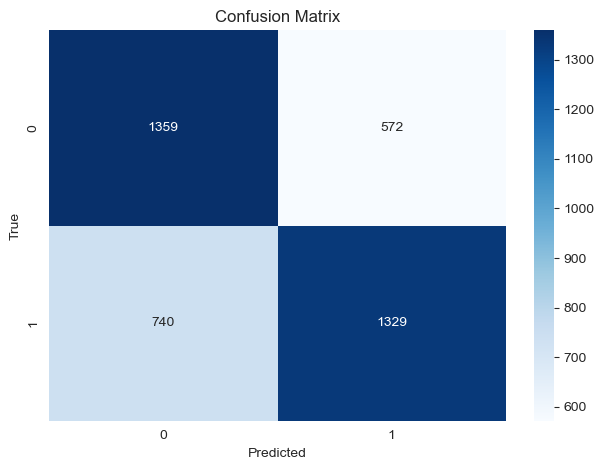

In [3]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
#plt.savefig('../../thesis/images/static_cm.pgf', bbox_inches='tight')
plt.show()